## 1. Import libraries

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/train.csv')
df.head(12)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56
5,5,highway,3,0.54,70,night,foggy,True,False,morning,False,True,0,0.61
6,6,highway,1,0.04,45,night,foggy,False,True,morning,True,False,2,0.20
7,7,highway,2,0.33,45,daylight,clear,False,True,evening,False,True,0,0.16
8,8,rural,3,0.63,25,dim,clear,True,False,evening,True,True,2,0.18
9,9,urban,4,0.38,45,dim,clear,True,True,afternoon,True,True,2,0.15


## 2. Exploratory Data Analysis

### 2.1 Univariate Analysis

#### 2.1.1 Identifying Categorial Columns

In [4]:
categorical_cols = df.select_dtypes(include=['object','boolean','category']).columns.to_list()
categorical_cols

['road_type',
 'lighting',
 'weather',
 'road_signs_present',
 'public_road',
 'time_of_day',
 'holiday',
 'school_season']

In [ ]:
for i in categorical_cols:
    print("Unique values in ",i,"are :",df[i].unique())

Unique values in  road_type are : ['urban' 'rural' 'highway']
Unique values in  lighting are : ['daylight' 'dim' 'night']
Unique values in  weather are : ['rainy' 'clear' 'foggy']
Unique values in  road_signs_present are : [False  True]
Unique values in  public_road are : [ True False]
Unique values in  time_of_day are : ['afternoon' 'evening' 'morning']
Unique values in  holiday are : [False  True]
Unique values in  school_season are : [ True False]


#### 2.1.2 Visualising the distribution of Categorial Columns

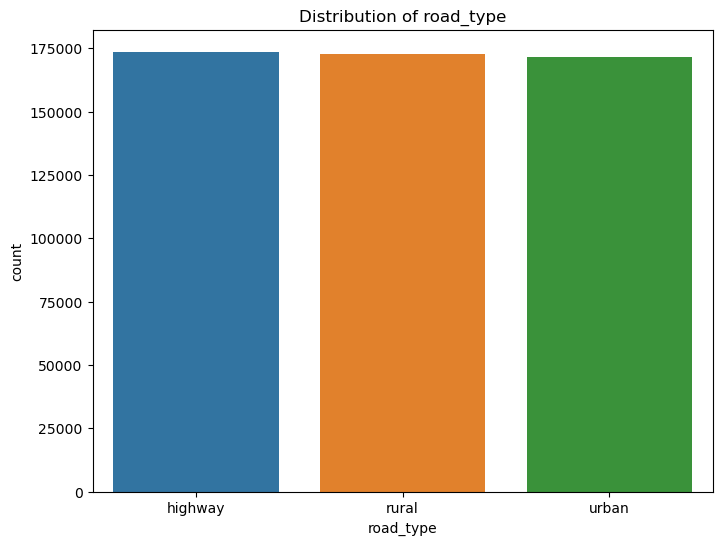

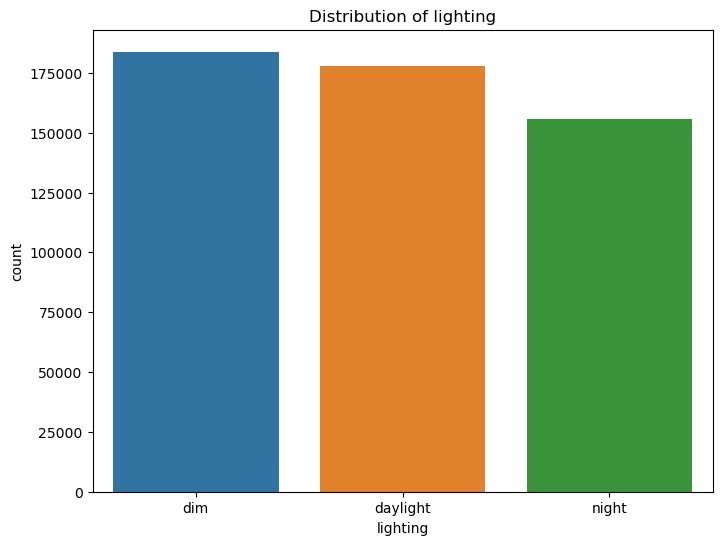

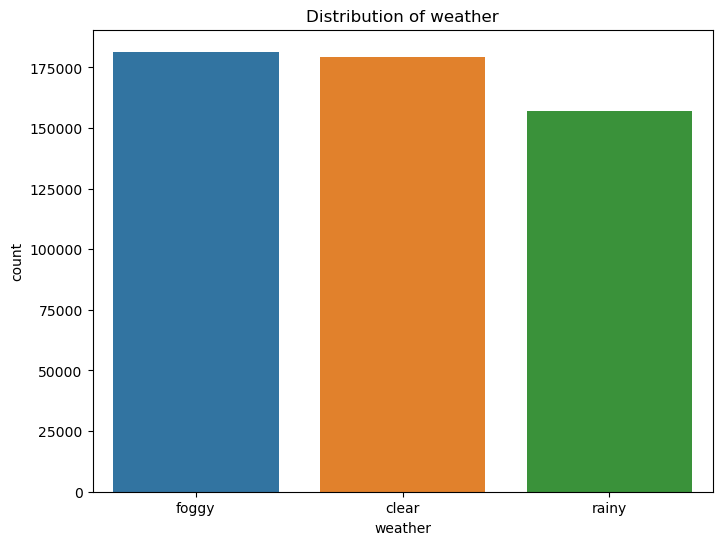

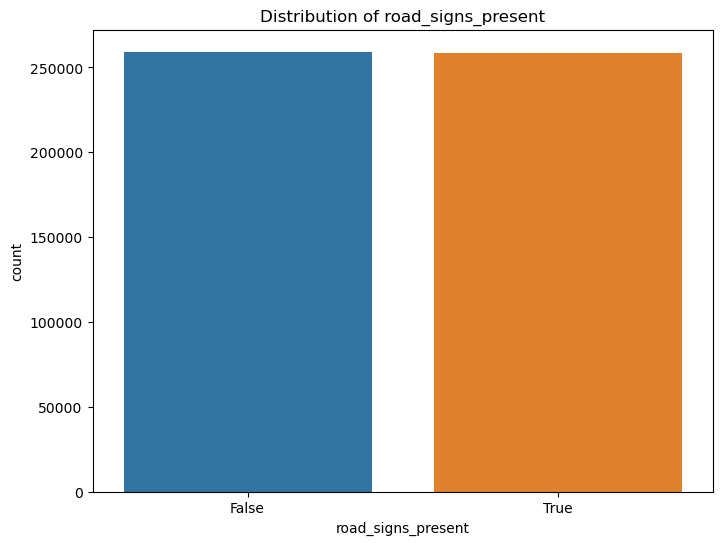

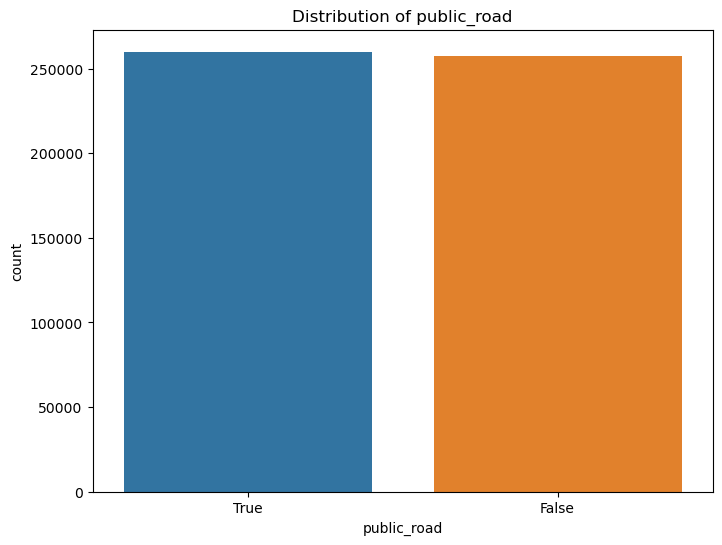

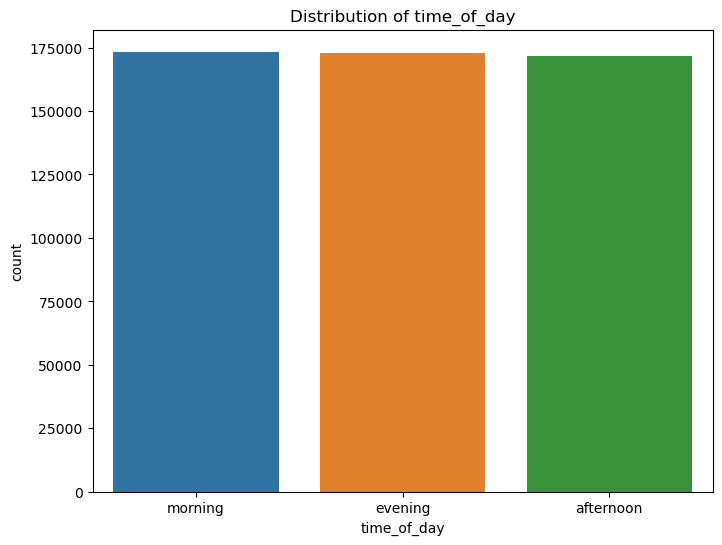

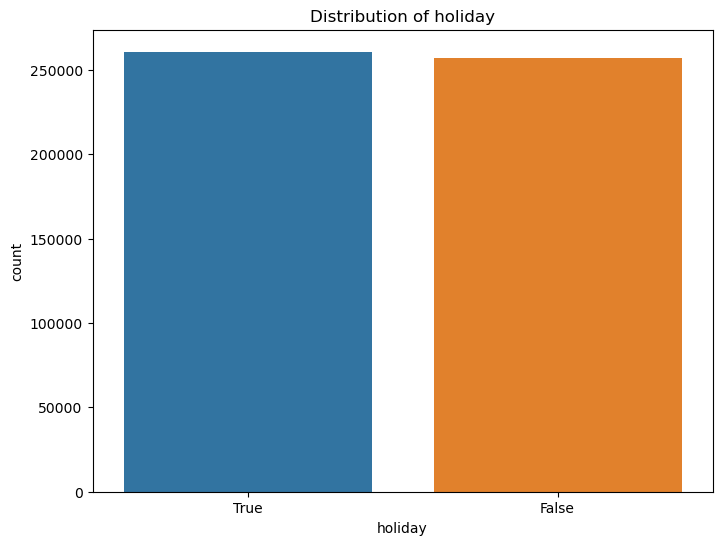

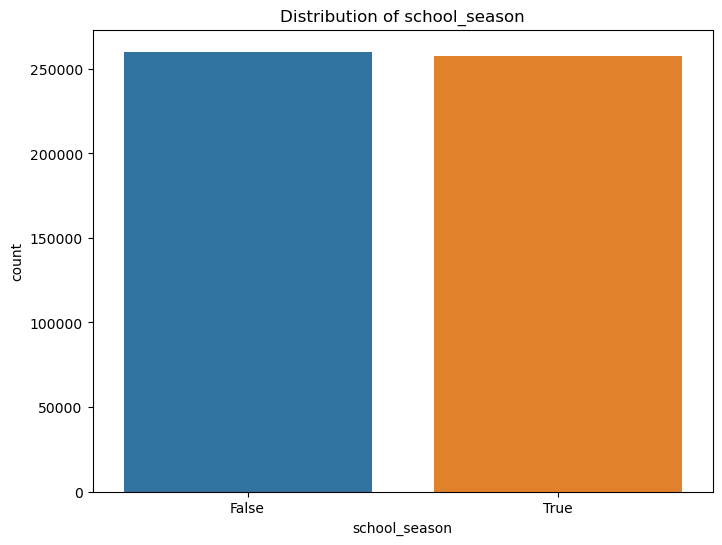

In [39]:
for i in categorical_cols:
    plt.figure(figsize=(8,6))
    order = df[i].value_counts().sort_values(ascending=False).index
    sb.countplot(data =df,x=i,order=order)
    plt.title("Distribution of " + i)
    plt.show()

#### 2.1.3 Identifying Numerical Columns

In [53]:
numerical_cols = df.select_dtypes(include=['int']).columns.to_list()
# here not including float datatype as it is present only in continous attributes "curvature" & "accident risk"
# will plot these columns seperately in EDA
numerical_cols

['id', 'num_lanes', 'speed_limit', 'num_reported_accidents']

##### Since "id" column  will be used only for model train & test purposes, i will drop this column for EDA

In [ ]:
del numerical_cols[0]
numerical_cols

In [56]:
for i in numerical_cols:
    print("Unique values in",i,"are:",df[i].unique())

Unique values in num_lanes are: [2 4 1 3]
Unique values in speed_limit are: [35 70 60 45 25]
Unique values in num_reported_accidents are: [1 0 2 3 4 5 6 7]


#### 2.1.4 Visualising the distribution of Numerical Columns with discrete values

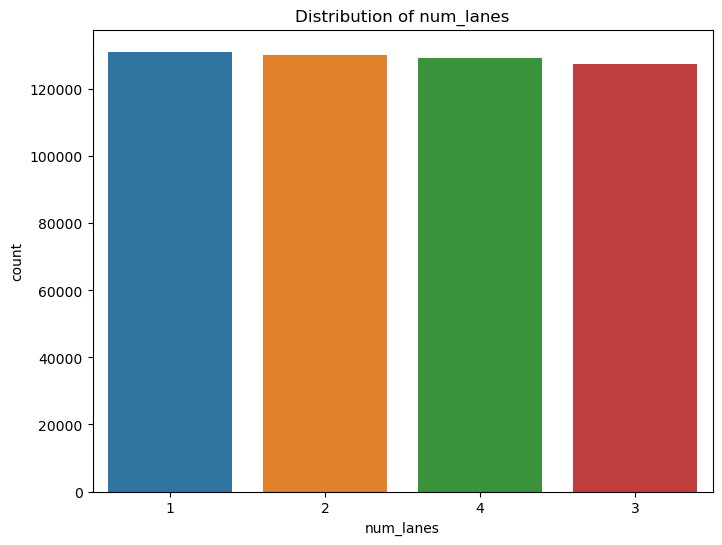

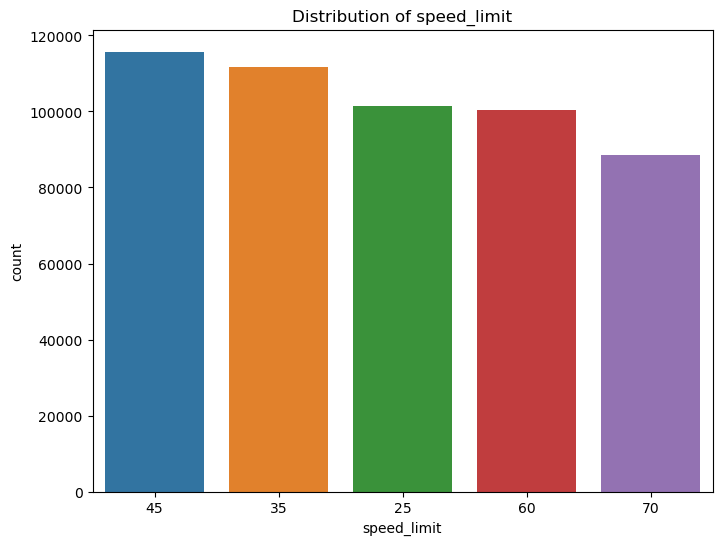

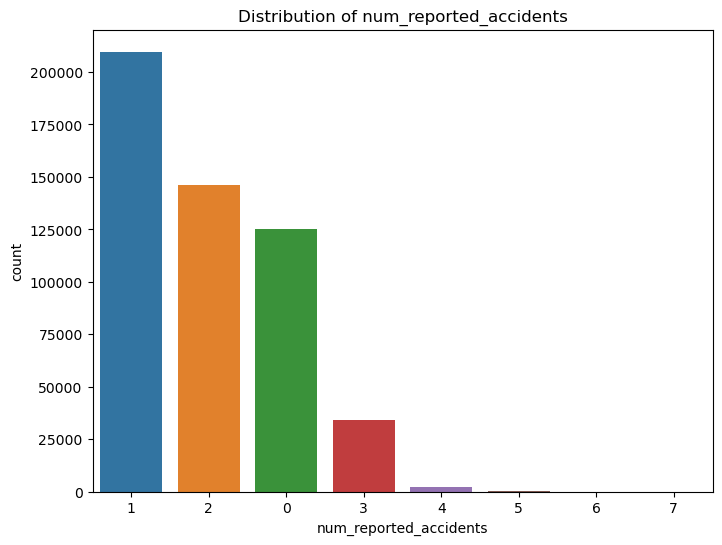

In [57]:
for i in numerical_cols:
    plt.figure(figsize=(8,6))
    order = df[i].value_counts().sort_values(ascending=False).index
    sb.countplot(data =df,x=i,order=order)
    plt.title("Distribution of " + i)
    plt.show()

#### 2.1.5 Visualising the distribution of Numerical Columns with floating point values

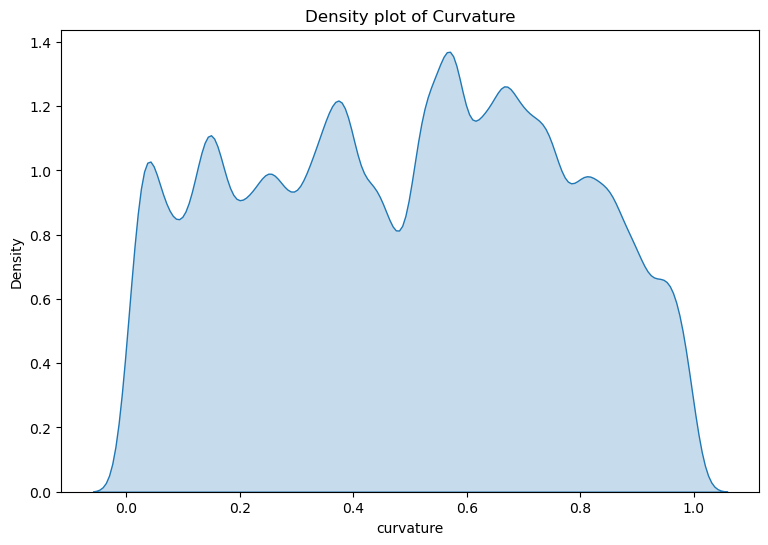

In [64]:
plt.figure(figsize=(9,6))
sb.kdeplot(df['curvature'],fill=True)
plt.title("Density plot of Curvature")
plt.show()

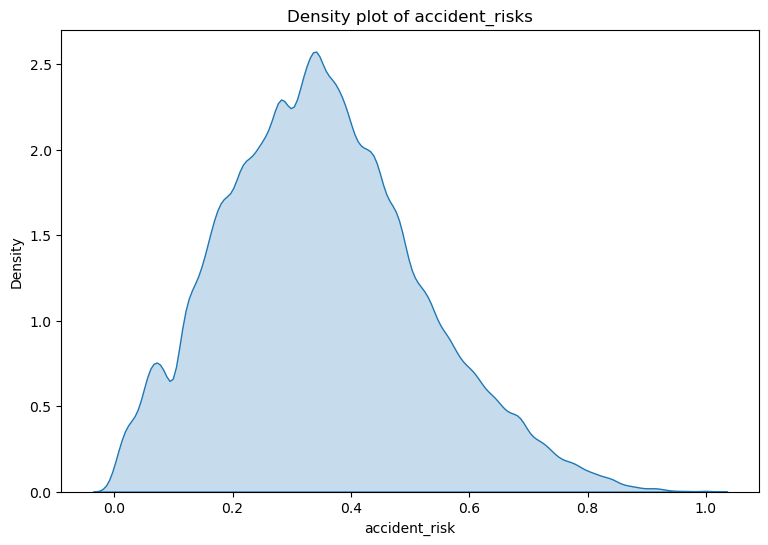

In [66]:
plt.figure(figsize=(9,6))
sb.kdeplot(df['accident_risk'],fill=True)
plt.title("Density plot of accident_risks")
plt.show()